<a href="https://colab.research.google.com/github/koushikkirugulige/Football-Analytics/blob/master/xGStatsbombBarca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time
!git clone https://github.com/statsbomb/open-data.git

Cloning into 'open-data'...
remote: Enumerating objects: 1088, done.
remote: Counting objects: 100% (1088/1088), done.
remote: Compressing objects: 100% (591/591), done.
remote: Total 9810 (delta 893), reused 674 (delta 479), pack-reused 8722
Receiving objects: 100% (9810/9810), 995.57 MiB | 14.28 MiB/s, done.
Resolving deltas: 100% (8640/8640), done.
Checking out files: 100% (1648/1648), done.
CPU times: user 548 ms, sys: 115 ms, total: 663 ms
Wall time: 2min 44s


In [0]:
#import all modules
import json
import os
import codecs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Rectangle, ConnectionPatch
from matplotlib.offsetbox import  OffsetImage
from matplotlib.patches import Ellipse
from functools import reduce
import math

In [3]:
%%time
comp = ['FIFA World Cup','La Liga']
main_df = pd.DataFrame(data=None)
path_match = "/content/open-data/data/events/" #location for play by play events
for root, dirs, files in os.walk('/content/open-data/data/matches/'):
     for file in files:
        with open(os.path.join(root, file), "r") as auto:
            with codecs.open(root + str('/') + file,encoding='utf-8') as data_file:
                data = json.load(data_file)
                df = pd.DataFrame(data=None)
                df = pd.json_normalize(data, sep = "_")
            #for x in df.competition_country_name:
            #    if x == 'Spain':
            #        print(df.match_id)
            #print(df['competition_competition_name'])
            for i in range(len(df)):
                if df.iloc[i]['competition_competition_name'] in comp  :
                    match_no = df.iloc[i]['match_id'] #gets match with Spain as country
                    match_no = str(match_no) # from int to str 
                    #print('match list \n',match_no)
                    with codecs.open(path_match + match_no + str(r'.json'),encoding="utf8") as event_file: #open the respective file
                        df_match = json.load(event_file)
                        df_match2 = pd.DataFrame(data=None)
                        df_match2 = pd.json_normalize(df_match,sep="_")    
                        df_match2 =  df_match2[(df_match2['type_name'] == "Shot")]
                    main_df = main_df.append(df_match2,ignore_index=True,sort=False)                    
#print('total matches ',len(match_no)) 
print('Done')

Done
CPU times: user 6min 3s, sys: 1.3 s, total: 6min 4s
Wall time: 6min 4s


In [7]:
main_df.head()

,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,possession_team_id,possession_team_name,play_pattern_id,play_pattern_name,team_id,team_name,tactics_formation,tactics_lineup,related_events,location,player_id,player_name,position_id,position_name,pass_recipient_id,pass_recipient_name,pass_length,pass_angle,pass_height_id,pass_height_name,pass_end_location,pass_type_id,pass_type_name,pass_body_part_id,pass_body_part_name,carry_end_location,under_pressure,pass_outcome_id,pass_outcome_name,pass_aerial_won,...,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,shot_one_on_one,bad_behaviour_card_id,bad_behaviour_card_name,50_50_outcome_id,50_50_outcome_name,dribble_overrun,goalkeeper_punched_out,pass_miscommunication,block_deflection,pass_goal_assist,clearance_other,injury_stoppage_in_chain,shot_deflected,dribble_no_touch,pass_deflected,shot_saved_off_target,goalkeeper_shot_saved_off_target,ball_recovery_offensive,pass_straight,foul_committed_penalty,foul_won_penalty,block_save_block,shot_open_goal,goalkeeper_lost_out,goalkeeper_success_in_play,player_off_permanent,goalkeeper_shot_saved_to_post,shot_redirect,shot_saved_to_post,shot_follows_dribble,goalkeeper_success_out,half_start_late_video_start,goalkeeper_lost_in_play,goalkeeper_saved_to_post,pass_backheel,half_end_early_video_end
0,2f046b33-685c-4122-8af2-8ceadf56c83d,294,1,00:06:50.216,6,50,12,0.115400,16,Shot,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,"[58295c63-1ffa-4e27-9258-818ea90c6b04, f514442...","[104.4, 41.8]",5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,855d47fc-9017-4508-8b41-0275dfb4d755,962,1,00:22:27.038,22,27,38,2.046458,16,Shot,217,Barcelona,2,From Corner,217,Barcelona,NaN,NaN,[aec80f5c-807e-47ac-8c33-092c92b222d1],"[110.8, 35.8]",5470.0,Ivan Rakitić,10.0,Center Defensive Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7c69fb86-c77d-463b-8f00-503e447492a4,1153,1,00:27:08.522,27,8,46,0.804175,16,Shot,217,Barcelona,2,From Corner,217,Barcelona,NaN,NaN,"[350f13e2-16cc-449d-a72d-f7ccd571fc50, 662299b...","[109.9, 40.5]",5492.0,Samuel Yves Umtiti,5.0,Left Center Back,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77ea8775-f9f4-4bf7-b3f9-7635ab861ab5,1254,1,00:30:13.151,30,13,59,0.380900,16,Shot,217,Barcelona,3,From Free Kick,217,Barcelona,NaN,NaN,"[30b9d0e1-5eeb-4cb0-86ea-a6e8967893e2, ae620c7...","[90.0, 36.2]",5503.0,Lionel Andrés Messi Cuccittini,17.0,Right Wing,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,09c2667a-4827-4871-a70a-96adb1d73243,1381,1,00:33:19.875,33,19,63,0.222600,16,Shot,217,Barcelona,4,From Throw In,217,Barcelona,NaN,NaN,"[19491e5f-dd7c-47a8-994d-b6aae0630b55, a81b342...","[97.3, 28.8]",6998.0,Rafael Alcântara do Nascimento,15.0,Left Center Midfield,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
"""Distance of shot location to centre of goal"""
def distFormula(coordinate):
  a =(math.sqrt(((coordinate.location[0] - 120)**2) + ((coordinate.location[1] - 36)**2))) 
  b =(math.sqrt(((coordinate.location[0] - 120)**2) + ((coordinate.location[1] - 44)**2))) 
  return ((a+b)/2)

In [0]:
""" near x y (nx,ny) (120,44)and far x y (fx,fy) (120,36)""" 
nx = 120
ny = 44
fx = 120
fy = 36

goalpostLength = 8
def shot_angle(points):
  len1 = (math.sqrt(((points.location[0] - nx)**2) + ((points.location[1] - ny)**2))) 
  len2 = (math.sqrt(((points.location[0] - fx)**2) + ((points.location[1] - fy)**2)))
  ang = (len1**2 + len2**2 - goalpostLength**2)/(2 * len1 * len2)
  if ang > 1:
    ang = 1
  elif ang < -1:
    ang = -1   
  angRad = math.acos(ang)
  return( (angRad * 180)/math.pi) 

In [0]:
"""If shot was taken under Pressure?"""
def under_pressure(coordinate):
  if coordinate['under_pressure'] == True:
    return 1
  return 0

In [0]:
"""The Shot type Id"""
def shot_type(coordinate):
  if coordinate['shot_type_id'] == 61:
    return 1
  if coordinate['shot_type_id'] == 62:
    return 2
  if coordinate['shot_type_id'] == 87:
    return 3
  if coordinate['shot_type_id'] == 88:
    return 4
  return 5

In [0]:
"""The Shot Body part"""
def shot_body_part(coordinate):
  if coordinate['shot_body_part_id'] == 37:
    return 1
  if coordinate['shot_body_part_id'] == 38:
    return 2
  if coordinate['shot_body_part_id'] == 70:
    return 3
  return 4

In [0]:
"""The Shot Technique Id"""
def shot_technique(coordinate):
  if coordinate['shot_technique_id'] == 89:
    return 1
  if coordinate['shot_technique_id'] == 90:
    return 2
  if coordinate['shot_technique_id'] == 91:
    return 3
  if coordinate['shot_technique_id'] == 92:
    return 4
  if coordinate['shot_technique_id'] == 93:
    return 5
  if coordinate['shot_technique_id'] == 94:
    return 6
  return 7

In [0]:
"""If shot was taken first time?"""
def shot_first_time(coordinate):
  if coordinate['shot_first_time'] == True:
    return 1
  return 0

In [0]:
"""If shot was taken first time?"""
def shot_one_on_one(coordinate):
  if coordinate['shot_one_on_one'] == True:
    return 1
  return 0

In [0]:
main_df['Distance'] = main_df.apply(distFormula,axis = 1)
main_df['Angle'] = main_df.apply(shot_angle,axis = 1)
main_df['UnderPressure'] = main_df.apply(under_pressure,axis = 1)
main_df['ShotType'] = main_df.apply(shot_type,axis = 1)
main_df['ShotBodyPart'] = main_df.apply(shot_body_part,axis = 1)
main_df['ShotTechnique'] = main_df.apply(shot_technique,axis = 1)
main_df['ShotFirstTime'] = main_df.apply(shot_first_time,axis = 1)
main_df['ShotOneonOne']= main_df.apply(shot_one_on_one,axis = 1)

In [0]:
goals_lst = main_df[main_df['shot_outcome_id'] == 97].index.tolist()

In [0]:
#if shot is a goal 
main_df['isGoal'] = False
goals_lst
main_df.loc[main_df.index.isin(goals_lst),'isGoal'] = True

In [62]:
main_df[['location','Distance','Angle','UnderPressure','ShotType','ShotBodyPart','ShotTechnique','ShotFirstTime','ShotOneonOne','isGoal']]

,location,Distance,Angle,UnderPressure,ShotType,ShotBodyPart,ShotTechnique,ShotFirstTime,ShotOneonOne,isGoal
0,"[104.4, 41.8]",16.198841,28.422114,0,3,4,5,1,0,False
1,"[110.8, 35.8]",10.763067,40.465393,0,3,1,5,0,0,False
2,"[109.9, 40.5]",10.873186,43.128076,1,3,1,5,0,0,False
3,"[90.0, 36.2]",30.499043,14.956182,0,2,2,5,0,0,False
4,"[97.3, 28.8]",25.566766,16.208386,0,3,4,5,0,0,False
...,...,...,...,...,...,...,...,...,...,...
12952,"[111.0, 27.0]",15.981653,17.102729,0,3,2,5,0,0,False
12953,"[114.0, 33.0]",9.619084,34.824489,0,3,2,5,0,0,True
12954,"[107.0, 32.0]",15.646638,25.606661,0,3,2,5,0,0,False
12955,"[97.0, 22.0]",29.376742,12.398277,0,3,4,5,0,0,False


#xG Model

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm
from sklearn import linear_model

In [0]:
xgModel = main_df[['location','Distance','Angle','UnderPressure','ShotType','ShotBodyPart','ShotTechnique','ShotFirstTime','ShotOneonOne','isGoal']]

In [0]:
X_train,X_test,y_train,y_test = train_test_split(xgModel[['location','Distance','Angle','UnderPressure','ShotType','ShotBodyPart','ShotTechnique','ShotFirstTime','ShotOneonOne']],xgModel['isGoal'],test_size = 0.2,shuffle = True)

**Logistic Regression** Model

In [0]:
clf = LogisticRegression(random_state=0,max_iter = 5000).fit(X_train[['Distance','Angle','UnderPressure','ShotType','ShotBodyPart','ShotTechnique','ShotFirstTime','ShotOneonOne']], y_train)

In [99]:
#model weights
clf.coef_[0]

array([-0.06605534,  0.02878253, -0.60546461,  1.03559372,  0.18762927,
        0.01151648,  0.18877916,  0.57099517])

**SGD** Model

In [0]:
xG = clf.predict_proba(X_test[['Distance','Angle','UnderPressure','ShotType','ShotBodyPart','ShotTechnique','ShotFirstTime','ShotOneonOne']])[:,1]

In [77]:
#SGD
sgdclf = linear_model.SGDClassifier(loss='log', alpha = 0.17)
sgdclf.fit(X_train[['Distance','Angle','UnderPressure','ShotType','ShotBodyPart','ShotTechnique','ShotFirstTime','ShotOneonOne']], y_train)

SGDClassifier(alpha=0.17, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Predict Shot Probability

In [0]:
# change model here sgcclf(SGD) or clf(LR)
xG = sgdclf.predict_proba(X_test[['Distance','Angle','UnderPressure','ShotType','ShotBodyPart','ShotTechnique','ShotFirstTime','ShotOneonOne']])[:,1]

In [101]:
X_test['xG'] = xG
#X_test.head()

,location,Distance,Angle,UnderPressure,ShotType,ShotBodyPart,ShotTechnique,ShotFirstTime,ShotOneonOne,xG
2961,"[92.2, 58.9]",33.779300,11.289656,0,3,4,5,0,0,0.035840
10990,"[115.2, 45.8]",8.019390,43.348531,0,3,1,5,0,1,0.340789
12649,"[115.0, 41.0]",6.451010,75.963757,0,3,1,5,0,0,0.453033
5264,"[111.9, 32.5]",11.445052,31.472019,1,3,1,5,0,0,0.082841
9283,"[111.6, 37.0]",9.696832,46.594546,1,3,1,5,0,0,0.135449


In [102]:
sortxg = X_test.sort_values(by = ['xG'],ascending=False)
sortxg

,location,Distance,Angle,UnderPressure,ShotType,ShotBodyPart,ShotTechnique,ShotFirstTime,ShotOneonOne,xG
4624,"[119.3, 41.4]",4.068882,157.545469,0,3,4,5,1,0,0.955584
3818,"[119.1, 42.6]",4.162706,139.499608,0,3,4,5,1,0,0.927110
6952,"[118.4, 39.4]",4.313989,135.619868,0,3,4,5,1,0,0.918449
8311,"[119.2, 37.0]",4.163095,134.820390,0,3,1,5,0,1,0.902713
12822,"[119.0, 43.0]",4.242641,126.869898,0,3,4,5,1,0,0.897920
...,...,...,...,...,...,...,...,...,...,...
3937,"[69.2, 77.6]",63.283107,5.832625,0,3,4,4,0,0,0.004453
2834,"[81.1, 5.9]",51.817864,6.672792,0,2,4,5,0,0,0.003497
6385,"[57.2, 34.0]",63.211517,7.223482,0,3,2,5,0,0,0.003241
11776,"[62.0, 36.0]",58.274562,7.853313,1,3,2,5,0,0,0.002498


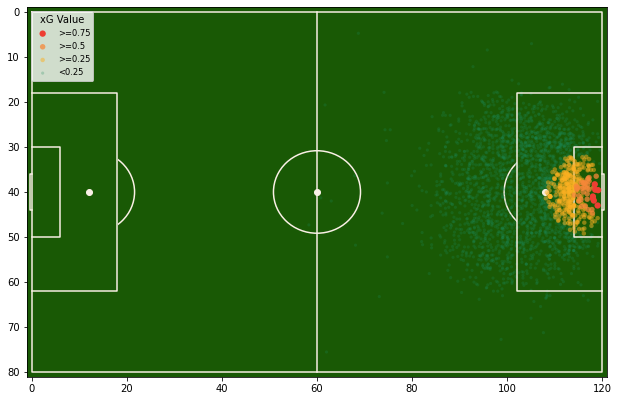

In [92]:
import StatsbombPitch as sb
sb.sb_pitch("#195905","#faf0e6","horizontal","full")
plt.gca().invert_yaxis()
for i in range(len(sortxg)):
    xe = sortxg.iloc[i]['location'][0]
    ye = sortxg.iloc[i]['location'][1]
    
    if sortxg.iloc[i]['xG'] >= 0.75:
      g = plt.scatter(xe,ye,color="#ee3e32",edgecolors="none",zorder=10,alpha=1,s = 40 )
    elif sortxg.iloc[i]['xG'] < 0.75 and sortxg.iloc[i]['xG'] >=0.5:
      o = plt.scatter(xe,ye,color="#f68838",edgecolors="none",zorder=8,alpha=0.75,s = 30 )
    elif sortxg.iloc[i]['xG'] < 0.5 and sortxg.iloc[i]['xG'] >=0.25:
      a = plt.scatter(xe,ye,color="#fbb021",edgecolors="none",zorder=6,alpha=0.5,s = 20 )  
    else:
      b = plt.scatter(xe,ye,color="#1b8a5a",edgecolors="none",zorder=4,alpha=0.25,s = 10 )    
plt.axis('off')
plt.legend((g,o,a,b),('>=0.75','>=0.5','>=0.25','<0.25'),scatterpoints=1,loc=2,title = 'xG Value',fontsize='small', fancybox=True)
#plt.title('xG SGD model')
#plt.savefig('xgSGDmodel.png')
plt.show()

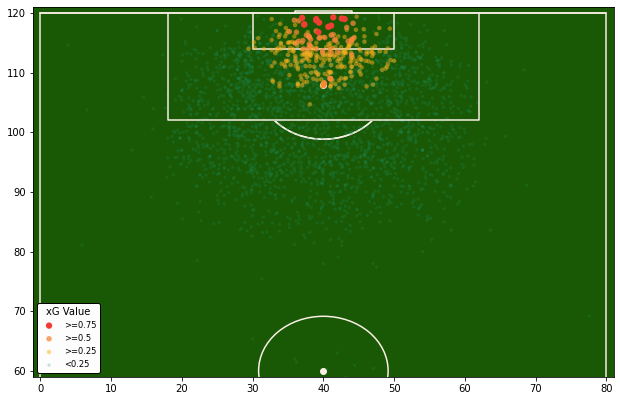

In [103]:
import StatsbombPitch as sb
sb.sb_pitch("#195905","#faf0e6","vertical","half")
#plt.gca().invert_xaxis()
for i in range(len(sortxg)):
    xe = sortxg.iloc[i]['location'][0]
    ye = sortxg.iloc[i]['location'][1]
    
    if sortxg.iloc[i]['xG'] >= 0.75:
      g = plt.scatter(ye,xe,color="#ee3e32",edgecolors="none",zorder=10,alpha=1,s = 40 )
    elif sortxg.iloc[i]['xG'] < 0.75 and sortxg.iloc[i]['xG'] >=0.5:
      o = plt.scatter(ye,xe,color="#f68838",edgecolors="none",zorder=8,alpha=0.75,s = 30 )
    elif sortxg.iloc[i]['xG'] < 0.5 and sortxg.iloc[i]['xG'] >=0.25:
      a = plt.scatter(ye,xe,color="#fbb021",edgecolors="none",zorder=6,alpha=0.5,s = 20 )  
    else:
      b = plt.scatter(ye,xe,color="#1b8a5a",edgecolors="none",zorder=4,alpha=0.25,s = 10 )    
plt.axis('off')
plt.legend((g,o,a,b),('>=0.75','>=0.5','>=0.25','<0.25'),scatterpoints=1,loc=3,title = 'xG Value',fontsize='small', fancybox=True,edgecolor = 'black',framealpha = 2
           )


#ax = plt.subplot()

#plt.savefig('MessiValverdeEraScatter.png')
plt.show()

In [104]:
#[['Distance','Angle','UnderPressure','ShotType','ShotBodyPart','ShotTechnique','ShotFirstTime','ShotOneonOne']]
clf.predict_proba(np.array([12.55,37.156,0,4,2,5,0,0]).reshape(1, -1))[:,1]

array([0.38105829])